## Table of contents

1. [Data Types](#datatype)   
    1.1 [Casting](#casting)
2. [Date format](#date)  
     2.1 [Calculating a field of dates certain weeks or months or years after existing field](#2.1)  
     2.2 [Calculating the interval between two date columns](#2.2)  
3. [Data Wrangling](#wrangling)  
4. [String functions](#strings)  
    4.1 [LEFT, RIGHT and LENGTH](#left)  
    4.2 [TRIM](#trim)  
    4.3 [POSITION and STRPOS](#position)   
    4.4 [SUBSTR](#substr)  
    4.5 [CONCAT](#concat)  
    4.6 [UPPER and LOWER](#upper)   
    4.7 [EXTRACT](#extract)   
    4.8 [DATE_TRUNC](#trunc)    
    4.9 [Current time and date](#timedate)  
    4.10 [COALESCE](#coalesce)   
5. [Subqueries](#subqueries)  
    5.1 [Subquery basics](#basics)   
    5.2 [Subqueries and aggregate](#aggregate)  
    5.3 [Subqueries in conditional logic](#conditional)  
    5.4 [Joining subqueries](#joining)  
    5.5 [Subqueries and UNIONs](#union)  

### 1. Data Types <a id="datatype"></a>
There are some functions in SQL that work with specific data types. For example, COUNT works on all types but SUM works only on numerical values. 

There are different data types as follows:

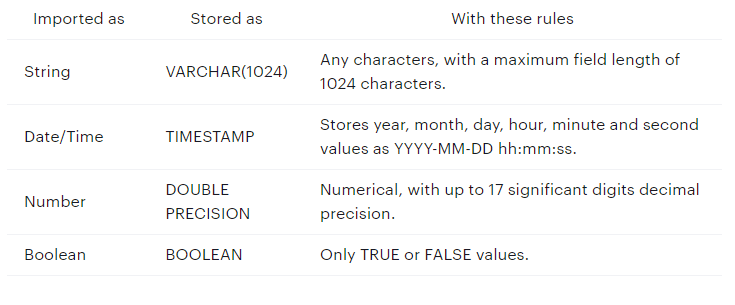

In [1]:
import pandas as pd
from sqlalchemy import create_engine
engine = create_engine('sqlite://', echo=False)
df1 = pd.read_csv(r"D:\Documents\Internships\GymCounselor\SQL RKT\companies.csv")
df1.to_sql('companies', engine)

In [2]:
df1.dtypes

category_code       object
permalink           object
founded_at_clean    object
dtype: object

In [3]:
from sqlalchemy import Column, Integer, DateTime

In [4]:
pd.read_sql("""SELECT * FROM companies LIMIT 5""", engine)

,index,category_code,permalink,founded_at_clean
0,0,None,/company/8868,None
1,1,None,/company/21e6,2013-01-01
2,2,software,/company/club-domains,2011-10-10
3,3,advertising,/company/fox-networks,None
4,4,games_video,/company/a-list-games,None


In [5]:
df2 = pd.read_csv(r"D:\Documents\Internships\GymCounselor\SQL RKT\acquisitions.csv")
df2.to_sql('acquisitions', engine)

In [6]:
pd.read_sql("""SELECT * FROM acquisitions LIMIT 5""", engine)

,index,company_permalink,acquired_at_cleaned
0,0,/company/waywire,2013-10-17 00:00:00
1,1,/company/1-nation-technology,2006-01-01 00:00:00
2,2,/company/1-stop-financial-service-centers-of-a...,2014-02-03 00:00:00
3,3,/company/1-800-contacts-2,2014-01-07 00:00:00
4,4,/company/1000memories,2012-10-03 00:00:00


### 1.1 Casting <a id="casting"></a>
The data type of a column can be changed by Casting. 

#### Method 1

In [7]:
df1.dtypes

category_code       object
permalink           object
founded_at_clean    object
dtype: object

In [8]:
df2.dtypes

company_permalink      object
acquired_at_cleaned    object
dtype: object

#### Change the datatype of permalink column to string.

In [9]:
pd.read_sql("""SELECT CAST(permalink AS VARCHAR(1024)) AS "Link"
                from companies 
                WHERE permalink IS NOT NULL 
                LIMIT 5""", engine)

,Link
0,/company/8868
1,/company/21e6
2,/company/club-domains
3,/company/fox-networks
4,/company/a-list-games


#### Method 2
The datatype of a column can also be changed by columnname::datatype.

#### Change the datatype of founded_at column to date.

In [10]:
"""SELECT name as "Company name", founded_at::date as "Date" 
        FROM companies 
        WHERE founded_at IS NOT NULL 
        LIMIT 7"""

'SELECT name as "Company name", founded_at::date as "Date" \n        FROM companies \n        WHERE founded_at IS NOT NULL \n        LIMIT 7'

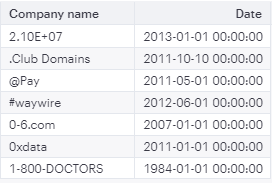

### 2.  Date Format <a id="date"></a>

If a date is in a format where year is listed first like YYYY-MM-DD, then it can be arranged in chronological order even when it is stored as a string.

### 2.1 Calculating a field of dates certain weeks or months or years after existing field <a id="2.1"></a>

#### Interval function
#### Calculate the date which is exactly one week after the date on whcih the company was founded.

In [11]:
"""SELECT companies.permalink,
       companies.founded_at_clean,
       companies.founded_at_clean::timestamp +
         INTERVAL '1 week' AS plus_one_week
  FROM tutorial.crunchbase_companies_clean_date companies
 WHERE founded_at_clean IS NOT NULL
 LIMIT 7"""

"SELECT companies.permalink,\n       companies.founded_at_clean,\n       companies.founded_at_clean::timestamp +\n         INTERVAL '1 week' AS plus_one_week\n  FROM tutorial.crunchbase_companies_clean_date companies\n WHERE founded_at_clean IS NOT NULL\n LIMIT 7"

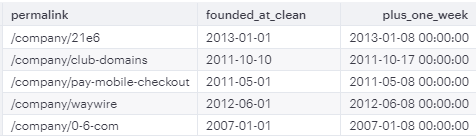

### 2.2 Calculating the interval between two date columns <a id="2.2"></a>


#### Calculate the number of days between the day the company was acquired and the day it was founded.

In [12]:
"""SELECT companies.permalink,
       companies.founded_at_clean,
       acquisitions.acquired_at_cleaned,
       acquisitions.acquired_at_cleaned -
         companies.founded_at_clean::timestamp AS time_to_acquisition
  FROM companies
  JOIN acquisitions
    ON acquisitions.company_permalink = companies.permalink
 WHERE founded_at_clean IS NOT NULL
 LIMIT 7"""

'SELECT companies.permalink,\n       companies.founded_at_clean,\n       acquisitions.acquired_at_cleaned,\n       acquisitions.acquired_at_cleaned -\n         companies.founded_at_clean::timestamp AS time_to_acquisition\n  FROM companies\n  JOIN acquisitions\n    ON acquisitions.company_permalink = companies.permalink\n WHERE founded_at_clean IS NOT NULL\n LIMIT 7'

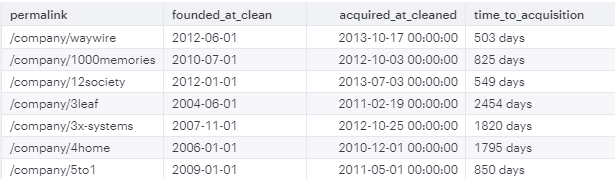

#### Calculate the number of days that has elapsed since the company was founded.

In [13]:
"""SELECT companies.permalink,
       companies.founded_at_clean,
       NOW() - companies.founded_at_clean::timestamp AS founded_time_ago
  FROM companies
 WHERE founded_at_clean IS NOT NULL"""

'SELECT companies.permalink,\n       companies.founded_at_clean,\n       NOW() - companies.founded_at_clean::timestamp AS founded_time_ago\n  FROM companies\n WHERE founded_at_clean IS NOT NULL'

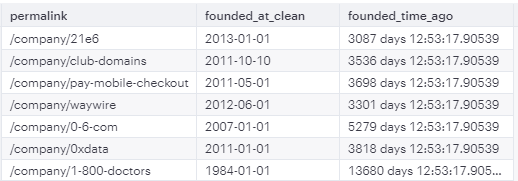

### 3. Data Wrangling <a id="wrangling"></a>
Data wrangling is the process of programmatically transforming data into a format that makes it easier to work with. This might mean modifying all of the values in a given column in a certain way, or merging multiple columns together.

In [14]:
df = pd.read_csv(r"D:\Documents\Internships\GymCounselor\SQL RKT\crime.csv")
df.to_sql('crimes', con = engine)

In [15]:
df.dtypes

incidnt_num    float64
category        object
descript        object
day_of_week     object
date            object
time            object
pd_district     object
resolution      object
address         object
lon            float64
lat            float64
location        object
id               int64
dtype: object

In [16]:
pd.read_sql("""SELECT * FROM crimes LIMIT 5""", engine)

,index,incidnt_num,category,descript,day_of_week,date,time,pd_district,resolution,address,lon,lat,location,id
0,0,140099416.0,VEHICLE THEFT,STOLEN AND RECOVERED VEHICLE,Friday,01/31/2014 08:00:00 AM +0000,17:00,INGLESIDE,NONE,0 Block of GARRISON AV,-122.413624,37.709726,"(37.709725805163, -122.413623946206)",1
1,1,140092426.0,ASSAULT,BATTERY,Friday,01/31/2014 08:00:00 AM +0000,17:45,TARAVAL,"ARREST, CITED",100 Block of FONT BL,-122.473706,37.715488,"(37.7154876086057, -122.47370623066)",2
2,2,140092410.0,SUSPICIOUS OCC,SUSPICIOUS OCCURRENCE,Friday,01/31/2014 08:00:00 AM +0000,15:30,PARK,NONE,0 Block of CASTRO ST,-122.435719,37.768689,"(37.7686887134351, -122.435718550322)",3
3,3,140092341.0,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Friday,01/31/2014 08:00:00 AM +0000,17:50,CENTRAL,"ARREST, CITED",JEFFERSON ST / POWELL ST,-122.412527,37.808625,"(37.8086250595467, -122.412527239682)",4
4,4,140092573.0,DRUG/NARCOTIC,POSSESSION OF NARCOTICS PARAPHERNALIA,Friday,01/31/2014 08:00:00 AM +0000,19:20,SOUTHERN,"ARREST, BOOKED",0 Block of GRACE ST,-122.414634,37.775081,"(37.7750814399634, -122.414633686589)",5


### 4. String functions <a id="strings"></a>
### 4.1 LEFT, RIGHT and LENGTH <a id = "left"></a>

Left and Right are used to extract a substring of a given length from the specified string. Length is used to find the length of a string.

#### Extract the date and time separately from the date column.

In [17]:
"""SELECT incidnt_num,
       date,
       LEFT(date, 10) AS cleaned_date,
       RIGHT(date, 17) AS cleaned_time
       FROM crimes
       LIMIT 7"""

'SELECT incidnt_num,\n       date,\n       LEFT(date, 10) AS cleaned_date,\n       RIGHT(date, 17) AS cleaned_time\n       FROM crimes\n       LIMIT 7'

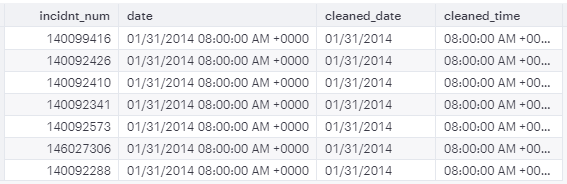

In [18]:
"""SELECT incidnt_num,
       date,
       LEFT(date, 10) AS cleaned_date,
       RIGHT(date, LENGTH(date) - 11) AS cleaned_time
  FROM crimes
  LIMIT 7"""

'SELECT incidnt_num,\n       date,\n       LEFT(date, 10) AS cleaned_date,\n       RIGHT(date, LENGTH(date) - 11) AS cleaned_time\n  FROM crimes\n  LIMIT 7'

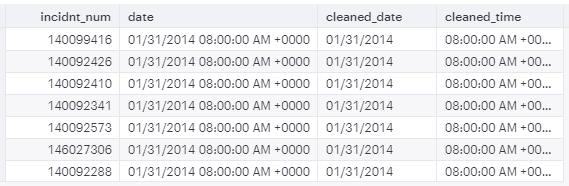

### 4.2 TRIM <a id="trim"></a>
The TRIM function is used to remove characters from the beginning and end of a string. The TRIM function takes 3 arguments, first you have to specify from where the character has to be removed (leading, trailing or both). Second argument is the haracter to be removed and third argument is the string from which the character has to be eliminated.

In [19]:
"""SELECT location,
       TRIM(both '()' FROM location)
  FROM crimes"""

"SELECT location,\n       TRIM(both '()' FROM location)\n  FROM crimes"

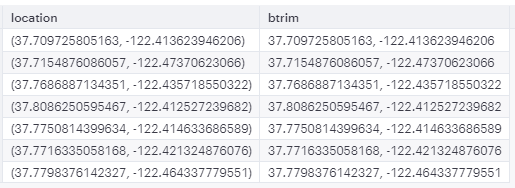

### 4.3 POSITION and STRPOS <a id="position"></a>

#### Position
POSITION allows you to specify a substring, then returns a numerical value equal to the character number (counting from left) where that substring first appears in the target string. It returns 0 if the character is not in the string.

In [20]:
"""SELECT incidnt_num,
       descript,
       POSITION('A' IN descript) AS a_position
       FROM crimes
       LIMIT 7"""

"SELECT incidnt_num,\n       descript,\n       POSITION('A' IN descript) AS a_position\n       FROM crimes\n       LIMIT 7"

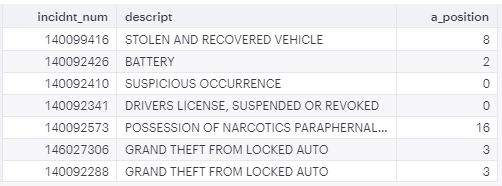

#### Strpos
The strpos() function finds the position of the first occurrence of a string inside another string.

In [21]:
"""SELECT incidnt_num,
       descript,
       STRPOS(descript, 'A') AS a_position
       FROM crimes
       LIMIT 7"""

"SELECT incidnt_num,\n       descript,\n       STRPOS(descript, 'A') AS a_position\n       FROM crimes\n       LIMIT 7"

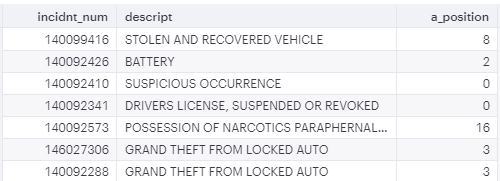

Both position and strypos are **case sensitive**.

### 4.4 SUBSTR <a id="substr"></a>
While the functions LEFT and RIGHT extract a part of a string, they start from the first letter but in SUBSTR, we can specify the starting position as well. 

In [22]:
"""SELECT incidnt_num,
       date,
       SUBSTR(date, 4, 2) AS day
       FROM crimes"""

'SELECT incidnt_num,\n       date,\n       SUBSTR(date, 4, 2) AS day\n       FROM crimes'

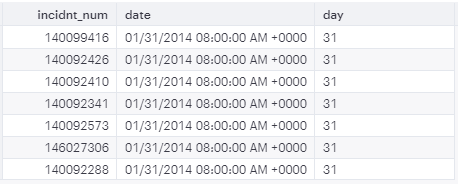

Write a query that separates the `location` field into separate fields for latitude and longitude.

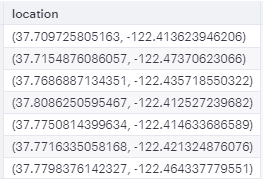

In [23]:
"""SELECT SUBSTR(location,POSITION(',' IN location)-2, 2) AS latitude,
        TRIM(TRAILING ')' IN RIGHT(location, LENGTH(location)-POSITION(',' IN location))) AS longitude
       FROM crimes"""

"SELECT SUBSTR(location,POSITION(',' IN location)-2, 2) AS latitude,\n        TRIM(TRAILING ')' IN RIGHT(location, LENGTH(location)-POSITION(',' IN location))) AS longitude\n       FROM crimes"

### 4.5 CONCAT <a id="concat"></a>
This is used to combine strings from several columns.

#### Concatenate the day of week and date.

In [24]:
"""SELECT incidnt_num,
       day_of_week,
       LEFT(date, 10) AS cleaned_date,
       CONCAT(day_of_week, ', ', LEFT(date, 10)) AS day_and_date
       FROM crimes LIMIT 7"""

"SELECT incidnt_num,\n       day_of_week,\n       LEFT(date, 10) AS cleaned_date,\n       CONCAT(day_of_week, ', ', LEFT(date, 10)) AS day_and_date\n       FROM crimes LIMIT 7"

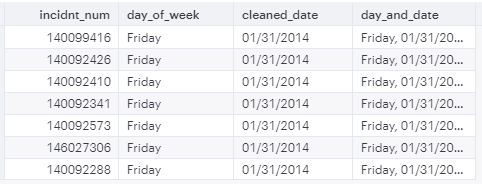

In [25]:
"""SELECT incidnt_num,
       day_of_week,
       LEFT(date, 10) AS cleaned_date,
       day_of_week || ', ' || LEFT(date, 10) AS day_and_date
       FROM crimes LIMIT 7"""

"SELECT incidnt_num,\n       day_of_week,\n       LEFT(date, 10) AS cleaned_date,\n       day_of_week || ', ' || LEFT(date, 10) AS day_and_date\n       FROM crimes LIMIT 7"

### 4.6 Changing case with UPPER and LOWER <a id="upper"></a>

In [26]:
pd.read_sql("""SELECT incidnt_num, category,
       address,
       UPPER(address) AS address_upper,
       LOWER(address) AS address_lower
  FROM crimes LIMIT 7""", engine)

,incidnt_num,category,address,address_upper,address_lower
0,140099416.0,VEHICLE THEFT,0 Block of GARRISON AV,0 BLOCK OF GARRISON AV,0 block of garrison av
1,140092426.0,ASSAULT,100 Block of FONT BL,100 BLOCK OF FONT BL,100 block of font bl
2,140092410.0,SUSPICIOUS OCC,0 Block of CASTRO ST,0 BLOCK OF CASTRO ST,0 block of castro st
3,140092341.0,OTHER OFFENSES,JEFFERSON ST / POWELL ST,JEFFERSON ST / POWELL ST,jefferson st / powell st
4,140092573.0,DRUG/NARCOTIC,0 Block of GRACE ST,0 BLOCK OF GRACE ST,0 block of grace st
5,146027306.0,LARCENY/THEFT,0 Block of MCCOPPIN ST,0 BLOCK OF MCCOPPIN ST,0 block of mccoppin st
6,140092288.0,LARCENY/THEFT,400 Block of 6TH AV,400 BLOCK OF 6TH AV,400 block of 6th av


#### QUESTION

Write a query that returns the `category` field, but with the first letter capitalized and the rest of the letters in lower-case.

In [27]:
"""SELECT UPPER(LEFT(category,1)) || LOWER(SUBSTR(category, 2, LENGTH(category)-1)) AS "Category"
    FROM crimes
    LIMIT 7"""

'SELECT UPPER(LEFT(category,1)) || LOWER(SUBSTR(category, 2, LENGTH(category)-1)) AS "Category"\n    FROM crimes\n    LIMIT 7'

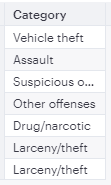

### 4.7 EXTRACT <a id = "extract"></a>

This is mainly used to extract different elements from the date.


In [28]:
"""SELECT cleaned_date,
       EXTRACT('year'   FROM cleaned_date) AS year,
       EXTRACT('month'  FROM cleaned_date) AS month,
       EXTRACT('day'    FROM cleaned_date) AS day,
       EXTRACT('hour'   FROM cleaned_date) AS hour,
       EXTRACT('minute' FROM cleaned_date) AS minute,
       EXTRACT('second' FROM cleaned_date) AS second,
       EXTRACT('decade' FROM cleaned_date) AS decade,
       EXTRACT('dow'    FROM cleaned_date) AS day_of_week
  FROM crimes
  LIMIT 7"""

"SELECT cleaned_date,\n       EXTRACT('year'   FROM cleaned_date) AS year,\n       EXTRACT('month'  FROM cleaned_date) AS month,\n       EXTRACT('day'    FROM cleaned_date) AS day,\n       EXTRACT('hour'   FROM cleaned_date) AS hour,\n       EXTRACT('minute' FROM cleaned_date) AS minute,\n       EXTRACT('second' FROM cleaned_date) AS second,\n       EXTRACT('decade' FROM cleaned_date) AS decade,\n       EXTRACT('dow'    FROM cleaned_date) AS day_of_week\n  FROM crimes\n  LIMIT 7"

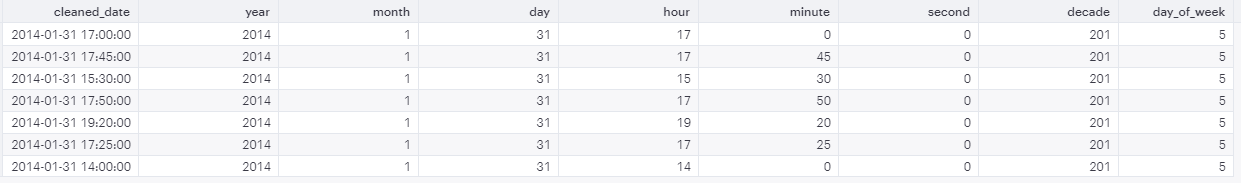

### 4.8 DATE_TRUNC <a id="trunc"></a>
The Date_trunc function is used to round dates to the nearest unit of measurement. It rounds a date to whatever precision we specify. The value displayed is the first value in that period. 

In [29]:
"""SELECT cleaned_date,
       DATE_TRUNC('year'   , cleaned_date) AS year,
       DATE_TRUNC('month'  , cleaned_date) AS month,
       DATE_TRUNC('week'   , cleaned_date) AS week,
       DATE_TRUNC('day'    , cleaned_date) AS day,
       DATE_TRUNC('hour'   , cleaned_date) AS hour,
       DATE_TRUNC('minute' , cleaned_date) AS minute,
       DATE_TRUNC('second' , cleaned_date) AS second,
       DATE_TRUNC('decade' , cleaned_date) AS decade
  FROM crimes
  LIMIT 7"""

"SELECT cleaned_date,\n       DATE_TRUNC('year'   , cleaned_date) AS year,\n       DATE_TRUNC('month'  , cleaned_date) AS month,\n       DATE_TRUNC('week'   , cleaned_date) AS week,\n       DATE_TRUNC('day'    , cleaned_date) AS day,\n       DATE_TRUNC('hour'   , cleaned_date) AS hour,\n       DATE_TRUNC('minute' , cleaned_date) AS minute,\n       DATE_TRUNC('second' , cleaned_date) AS second,\n       DATE_TRUNC('decade' , cleaned_date) AS decade\n  FROM crimes\n  LIMIT 7"

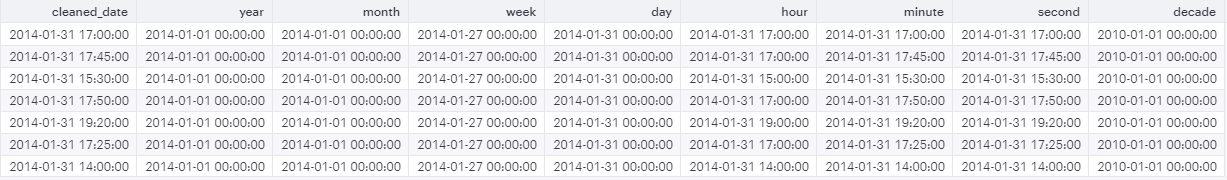

### 4.9 Current time and date <a id="timedate"></a>
It shows the current time and date.

In [30]:
"""SELECT CURRENT_DATE AS date,
       CURRENT_TIME AS time,
       CURRENT_TIMESTAMP AS timestamp,
       LOCALTIME AS localtime,
       LOCALTIMESTAMP AS localtimestamp,
       NOW() AS now"""

'SELECT CURRENT_DATE AS date,\n       CURRENT_TIME AS time,\n       CURRENT_TIMESTAMP AS timestamp,\n       LOCALTIME AS localtime,\n       LOCALTIMESTAMP AS localtimestamp,\n       NOW() AS now'

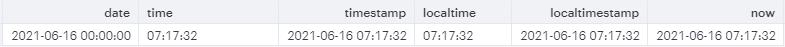

### 4.10 COALESCE <a id="coalesce"></a>
This is used to replace null or missing values in the dataset by a specified value.

In [43]:
pd.read_sql("""SELECT incidnt_num,
       descript,
       COALESCE(descript, 'No Description')
  FROM crimes
 ORDER BY descript DESC
 LIMIT 7""", engine)

,incidnt_num,descript,"COALESCE(descript, 'No Description')"
0,140091666.0,WARRANT ARREST,WARRANT ARREST
1,140090771.0,VIOLATION OF PARK CODE,VIOLATION OF PARK CODE
2,140092090.0,UNDER INFLUENCE OF ALCOHOL IN A PUBLIC PLACE,UNDER INFLUENCE OF ALCOHOL IN A PUBLIC PLACE
3,140092410.0,SUSPICIOUS OCCURRENCE,SUSPICIOUS OCCURRENCE
4,140091757.0,SUSPICIOUS OCCURRENCE,SUSPICIOUS OCCURRENCE
5,140091105.0,STOLEN TRUCK,STOLEN TRUCK
6,140099228.0,STOLEN TRUCK,STOLEN TRUCK


### 5. Subqueries <a id="subqueries"></a>
Subqueries (also known as inner queries or nested queries) are a tool for performing operations in multiple steps.

### 5.1 Subquery basics <a id="basics"></a>

#### Filter for crimes which took place on Friday.

In [32]:
pd.read_sql("""SELECT * FROM crimes WHERE day_of_week="Friday" LIMIT 2""", engine)

,index,incidnt_num,category,descript,day_of_week,date,time,pd_district,resolution,address,lon,lat,location,id
0,0,140099416.0,VEHICLE THEFT,STOLEN AND RECOVERED VEHICLE,Friday,01/31/2014 08:00:00 AM +0000,17:00,INGLESIDE,NONE,0 Block of GARRISON AV,-122.413624,37.709726,"(37.709725805163, -122.413623946206)",1
1,1,140092426.0,ASSAULT,BATTERY,Friday,01/31/2014 08:00:00 AM +0000,17:45,TARAVAL,"ARREST, CITED",100 Block of FONT BL,-122.473706,37.715488,"(37.7154876086057, -122.47370623066)",2


#### Filter for crimes which are unresolved, i.e, resolution is NONE.

In [33]:
pd.read_sql("""SELECT * FROM crimes WHERE resolution = "NONE" LIMIT 2""", engine)

,index,incidnt_num,category,descript,day_of_week,date,time,pd_district,resolution,address,lon,lat,location,id
0,0,140099416.0,VEHICLE THEFT,STOLEN AND RECOVERED VEHICLE,Friday,01/31/2014 08:00:00 AM +0000,17:00,INGLESIDE,NONE,0 Block of GARRISON AV,-122.413624,37.709726,"(37.709725805163, -122.413623946206)",1
1,2,140092410.0,SUSPICIOUS OCC,SUSPICIOUS OCCURRENCE,Friday,01/31/2014 08:00:00 AM +0000,15:30,PARK,NONE,0 Block of CASTRO ST,-122.435719,37.768689,"(37.7686887134351, -122.435718550322)",3


#### Filter for crimes that took place on Friday and are unresolved.

In [34]:
pd.read_sql("""SELECT sub.* FROM (
                SELECT * FROM crimes WHERE day_of_week="Friday") sub
                WHERE sub.resolution = "NONE"  
                LIMIT 2""", engine)

,index,incidnt_num,category,descript,day_of_week,date,time,pd_district,resolution,address,lon,lat,location,id
0,0,140099416.0,VEHICLE THEFT,STOLEN AND RECOVERED VEHICLE,Friday,01/31/2014 08:00:00 AM +0000,17:00,INGLESIDE,NONE,0 Block of GARRISON AV,-122.413624,37.709726,"(37.709725805163, -122.413623946206)",1
1,2,140092410.0,SUSPICIOUS OCC,SUSPICIOUS OCCURRENCE,Friday,01/31/2014 08:00:00 AM +0000,15:30,PARK,NONE,0 Block of CASTRO ST,-122.435719,37.768689,"(37.7686887134351, -122.435718550322)",3


#### QUESTION

Suggest another way to get the same output with a single query without using subquery.

#### Working of the above query

SELECT sub.*  
  FROM (  
       #<<results from inner query go here>>
       ) sub  
 WHERE sub.resolution = 'NONE'   
    
    
Subqueries are required to have names just like tables are given aliases.

#### Write a query that selects all burglaries then wrap it in an outer query that only displays unresolved incidents.

In [35]:
pd.read_sql("""SELECT sub.* FROM 
            (SELECT * FROM crimes
            WHERE category ="BURGLARY") sub
            WHERE  resolution = "NONE" """, engine)

,index,incidnt_num,category,descript,day_of_week,date,time,pd_district,resolution,address,lon,lat,location,id
0,60,140098628.0,BURGLARY,"BURGLARY,STORE UNDER CONSTRUCTION, FORCIBLE ENTRY",Friday,01/31/2014 08:00:00 AM +0000,17:00,MISSION,NONE,2800 Block of 23RD ST,-122.387724,37.752909,"(37.7529087730115, -122.38772399978)",61
1,90,140091218.0,BURGLARY,"BURGLARY OF RESIDENCE, FORCIBLE ENTRY",Friday,01/31/2014 08:00:00 AM +0000,10:10,INGLESIDE,NONE,100 Block of MADISON ST,-122.423124,37.727631,"(37.727631302439, -122.423123727204)",91
2,98,140090828.0,BURGLARY,"BURGLARY, FORCIBLE ENTRY",Friday,01/31/2014 08:00:00 AM +0000,05:30,NORTHERN,NONE,2200 Block of LOMBARD ST,-122.439306,37.799395,"(37.7993946618998, -122.43930620989)",99


### 5.2 Subsqueries and Aggregate  <a id="aggregate"></a>

#### Find the average number of incidents that take place on a given day of week in a month.

In [36]:
# subquery calculates the number of crimes that occur daily
# group by month and day of week to compute the average number of incidents


"""SELECT LEFT(sub.date, 2) AS cleaned_month,
       sub.day_of_week,
       AVG(sub.incidents) AS average_incidents
  FROM (
        SELECT day_of_week,
               date,
               COUNT(incidnt_num) AS incidents
          FROM tutorial.sf_crime_incidents_2014_01
         GROUP BY 1,2
       ) sub
 GROUP BY 1,2
 ORDER BY 1,2"""

'SELECT LEFT(sub.date, 2) AS cleaned_month,\n       sub.day_of_week,\n       AVG(sub.incidents) AS average_incidents\n  FROM (\n        SELECT day_of_week,\n               date,\n               COUNT(incidnt_num) AS incidents\n          FROM tutorial.sf_crime_incidents_2014_01\n         GROUP BY 1,2\n       ) sub\n GROUP BY 1,2\n ORDER BY 1,2'

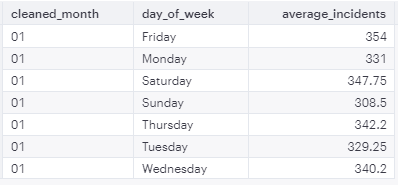

### 5.3 Subqueries in conditional logic <a id="conditional"></a>
Subquery is used as a part of the WHERE clause. 

#### Filter the crimes that occurred on the first day.

In [37]:
# first, calculating the starting date
# filtering the dataset to show crimes which occurred on that date
# subquery is used as WHERE cannot directly be used with aggregate conditions
# WHERE date = Min(date) would return error

pd.read_sql("""SELECT *
  FROM crimes
 WHERE Date = (SELECT MIN(date)
                 FROM crimes
              ) LIMIT 7""", engine)

,index,incidnt_num,category,descript,day_of_week,date,time,pd_district,resolution,address,lon,lat,location,id
0,0,140099416.0,VEHICLE THEFT,STOLEN AND RECOVERED VEHICLE,Friday,01/31/2014 08:00:00 AM +0000,17:00,INGLESIDE,NONE,0 Block of GARRISON AV,-122.413624,37.709726,"(37.709725805163, -122.413623946206)",1
1,1,140092426.0,ASSAULT,BATTERY,Friday,01/31/2014 08:00:00 AM +0000,17:45,TARAVAL,"ARREST, CITED",100 Block of FONT BL,-122.473706,37.715488,"(37.7154876086057, -122.47370623066)",2
2,2,140092410.0,SUSPICIOUS OCC,SUSPICIOUS OCCURRENCE,Friday,01/31/2014 08:00:00 AM +0000,15:30,PARK,NONE,0 Block of CASTRO ST,-122.435719,37.768689,"(37.7686887134351, -122.435718550322)",3
3,3,140092341.0,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Friday,01/31/2014 08:00:00 AM +0000,17:50,CENTRAL,"ARREST, CITED",JEFFERSON ST / POWELL ST,-122.412527,37.808625,"(37.8086250595467, -122.412527239682)",4
4,4,140092573.0,DRUG/NARCOTIC,POSSESSION OF NARCOTICS PARAPHERNALIA,Friday,01/31/2014 08:00:00 AM +0000,19:20,SOUTHERN,"ARREST, BOOKED",0 Block of GRACE ST,-122.414634,37.775081,"(37.7750814399634, -122.414633686589)",5
5,5,146027306.0,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,01/31/2014 08:00:00 AM +0000,17:25,SOUTHERN,NONE,0 Block of MCCOPPIN ST,-122.421325,37.771634,"(37.7716335058168, -122.421324876076)",6
6,6,140092288.0,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,01/31/2014 08:00:00 AM +0000,14:00,RICHMOND,NONE,400 Block of 6TH AV,-122.464338,37.779838,"(37.7798376142327, -122.464337779551)",7


### 5.4 Joining subqueries <a id ="joining"></a>

#### Write a query to show the total number of incidents that occur on a given day along with the other details.

In [38]:
# first, counting the number of incidents per day
# joining this table to the original table to get the count of incidents that occurred that day along with other details
# Windows function can also be used

pd.read_sql("""SELECT incidents.*,
       sub.incidents AS incidents_that_day
  FROM crimes incidents
  JOIN ( SELECT date,
          COUNT(incidnt_num) AS incidents
           FROM crimes
          GROUP BY 1
       ) sub
    ON incidents.date = sub.date
 ORDER BY sub.incidents DESC, time LIMIT 7""", engine)

,index,incidnt_num,category,descript,day_of_week,date,time,pd_district,resolution,address,lon,lat,location,id,incidents_that_day
0,29,140091177.0,NON-CRIMINAL,"DEATH REPORT, CAUSE UNKNOWN",Friday,01/31/2014 08:00:00 AM +0000,00:01,TARAVAL,NONE,1400 Block of 48TH AV,-122.508010,37.758933,"(37.7589334708659, -122.508010096521)",30,100
1,40,140091105.0,VEHICLE THEFT,STOLEN TRUCK,Friday,01/31/2014 08:00:00 AM +0000,00:01,BAYVIEW,NONE,1500 Block of PALOU AV,-122.390048,37.733451,"(37.7334509801006, -122.390048154309)",41,100
2,50,146021659.0,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Friday,01/31/2014 08:00:00 AM +0000,00:01,NORTHERN,NONE,1000 Block of EDDY ST,-122.425435,37.782341,"(37.7823409551124, -122.425434757144)",51,100
3,66,140093725.0,NON-CRIMINAL,LOST PROPERTY,Friday,01/31/2014 08:00:00 AM +0000,00:01,SOUTHERN,NONE,300 Block of 11TH ST,-122.413484,37.771478,"(37.7714776245994, -122.413484442909)",67,100
4,67,140093725.0,FRAUD,"CREDIT CARD, THEFT BY USE OF",Friday,01/31/2014 08:00:00 AM +0000,00:01,SOUTHERN,NONE,300 Block of 11TH ST,-122.413484,37.771478,"(37.7714776245994, -122.413484442909)",68,100
5,49,140090527.0,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Friday,01/31/2014 08:00:00 AM +0000,00:15,CENTRAL,"ARREST, CITED",BROADWAY ST / COLUMBUS AV,-122.406670,37.797864,"(37.7978641744394, -122.406669739951)",50,100
6,45,140090721.0,ROBBERY,ATTEMPTED ROBBERY ON THE STREET WITH BODILY FORCE,Friday,01/31/2014 08:00:00 AM +0000,00:45,SOUTHERN,NONE,1300 Block of FOLSOM ST,-122.412398,37.772995,"(37.7729954122426, -122.412397542907)",46,100


### 5.5 Subqueries and UNIONs <a id="union"></a>

In [39]:
# Creating subsets of the data

crimes_1 = df.iloc[1:10,:]
crimes_2 = df.iloc[11:20,:]
crimes_1.to_sql('crimes1', engine)
crimes_2.to_sql('crimes2', engine)

#### Calculate the total number of rows in a dataset after combing two subsets.

In [40]:
pd.read_sql("""SELECT COUNT(*) as "Total Rows" FROM
            (SELECT * FROM crimes1
            UNION ALL
            SELECT * FROM crimes2) sub""", engine)

,Total Rows
0,18
